This Mini Project will give you a glimpse of **"How to do a Real World Data science Project!"**

Here are few steps:


*   Import necessary libraries and modules
(you need not to know every library at the start,you can always add them later)
*   Download the dataset
*   Load the Dataset by using Pandas
*   clean and understand the Data set 
*   understand the Data set more by Visualization
*   Start Pre-processing of the Data set
*   Come to conclusion whether its classification/clustering
*   **apply machine learning algorithms related to classification/clustering (only 1 for now)** and evaluate the algorithm using different matrices like f1_score,jaccard-index,log_loss.


Choose any one of the Machine Learning Algorithm:

**1.k-nearest neighbors |
2.Decision trees  |
3.Support Vector Machine  |
4.Logistic Regression |**  



# Import necessary libraries and modules
(you need not to know every library at the start,you can always add them later)

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

#   Load the Dataset by using Pandas


In [3]:
df = pd.read_csv('loan_train.csv')


# clean and understand the Data set 

In [4]:
#see first 5 rows of your dataframe
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#see shape of your dataframe
df.shape

(346, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [7]:
df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [8]:
#pip install dtale

In [9]:
#import dtale
#dtale.show(df)

### Convert to date time object 

In [10]:
#convert both due_date and effective_date to datetime object
df["effective_date"]=pd.to_datetime(df["effective_date"])
df["due_date"]=pd.to_datetime(df["due_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


# understand the Data set more by Visualization



Let’s see how many of each class is in our data set 

In [11]:
# use value counts to see how many each class count is present in the dataframe
print(df["Gender"].value_counts())
print(df["education"].value_counts())
print(df["loan_status"].value_counts())

male      294
female     52
Name: Gender, dtype: int64
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

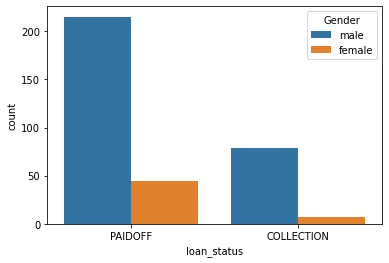

In [12]:
import seaborn as sns
# plot loan status paidoff/collected by gender i.e male and female
sns.countplot(x="loan_status", hue="Gender", data=df)

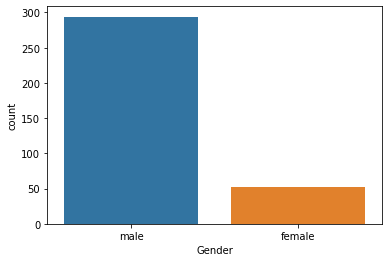

In [13]:
sns.countplot(x="Gender", data=df)

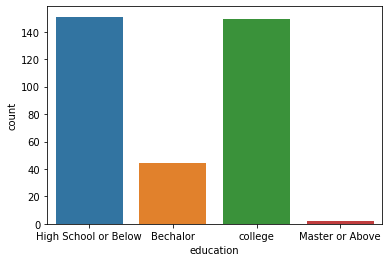

In [14]:
sns.countplot(x="education", data=df)

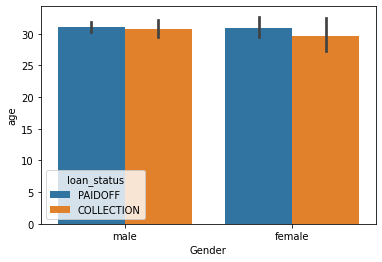

In [15]:
# plot loan paidoff/collected by gender i.e male and female along with their age
sns.barplot(x="Gender",y="age", hue="loan_status", data=df)

[45 33 27 28 29 36 26 39 40 32 25 34 31 37 21 30 24 35 22 50 44 43 46 38
 23 20 47 42 19 51 41 18]


26    29
29    27
30    27
27    25
28    24
35    20
34    20
31    19
33    17
25    16
24    14
32    14
37    11
38     9
36     9
40     8
39     8
23     8
22     7
21     5
44     4
45     4
42     3
50     3
20     3
43     3
46     2
19     2
41     2
51     1
47     1
18     1
Name: age, dtype: int64

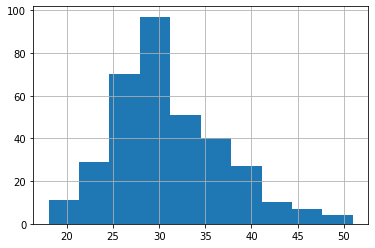

In [16]:
df["age"].hist()
print(df["age"].unique())
df["age"].value_counts()

# Start Pre-processing of the Data set
##### Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

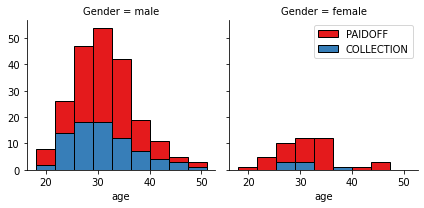

In [17]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [18]:
df["daysofweek"]=df["due_date"]-df["effective_date"]
df["daysofweek"].value_counts()

29 days    176
14 days    139
59 days     12
6 days      11
44 days      5
13 days      3
Name: daysofweek, dtype: int64

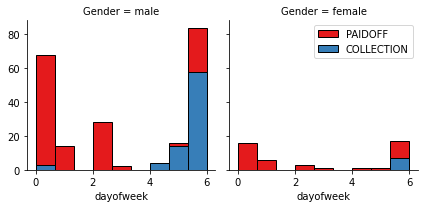

In [19]:
#plot loan status of male and female on different days of a Week!
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [20]:
#set a threshold values less then day 4 for dayofweek
#use  lambda function to achieve it
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysofweek,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29 days,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [21]:
#use grouby function on Gender and loan_status along with value_counts
A=df.groupby(['Gender', 'loan_status'])
print(A.count())

                    Principal  terms  effective_date  due_date  age  \
Gender loan_status                                                    
female COLLECTION           7      7               7         7    7   
       PAIDOFF             45     45              45        45   45   
male   COLLECTION          79     79              79        79   79   
       PAIDOFF            215    215             215       215  215   

                    education  daysofweek  dayofweek  weekend  
Gender loan_status                                             
female COLLECTION           7           7          7        7  
       PAIDOFF             45          45         45       45  
male   COLLECTION          79          79         79       79  
       PAIDOFF            215         215        215      215  


In [22]:
print(df.groupby(['Gender'])['loan_status'].value_counts(normalize=True))

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64


86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [23]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,daysofweek,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,29 days,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,29 days,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,14 days,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,29 days,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,29 days,4,1


## One Hot Encoding  
#### How about education?

In [24]:
#use grouby function on education and loan_status along with value_counts
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [25]:
#use grouby function on education and loan_status along with value_counts
df.groupby(['education', 'loan_status']).count()

Principal  terms  effective_date  due_date  \
education            loan_status                                               
Bechalor             COLLECTION          11     11              11        11   
                     PAIDOFF             33     33              33        33   
High School or Below COLLECTION          39     39              39        39   
                     PAIDOFF            112    112             112       112   
Master or Above      COLLECTION           1      1               1         1   
                     PAIDOFF              1      1               1         1   
college              COLLECTION          35     35              35        35   
                     PAIDOFF            114    114             114       114   

                                  age  Gender  daysofweek  dayofweek  weekend  
education            loan_status                                               
Bechalor             COLLECTION    11      11          11         11       11  
                     PAIDOFF       33      33          33         33       33  
High School or Below COLLECTION    39      39          39         39       39  
                     PAIDOFF      112     112         112        112      112  
Master or Above      COLLECTION     1       1           1          1        1  
                     PAIDOFF        1       1           1          1        1  
college              COLLECTION    35      35          35         35       35  
                     PAIDOFF      114     114         114        114      114

#### Feature before One Hot Encoding

In [26]:
#select what features you want to include in your dataframe
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [27]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [28]:
#define x
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [29]:
#define y
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Come to conclusion whether its classification/clustering

**CLASSIFICATION**

#    **apply machine learning algorithms related to classification/clustering (only 1 for now)** and evaluate the algorithm using different matrices


Choose any one of the Machine Learning Algorithm:

**1.k-nearest neighbors |
2.Decision trees  |
3.Support Vector Machine  |
4.Logistic Regression |**  


Now, it is your turn, use the training set to build an accurate model. 

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [31]:
# split train_loan
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4 )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## Finding the best k neighbors to improve  accuracy of the model

[0.67142857 0.65714286 0.71428571 0.68571429 0.75714286 0.71428571
 0.78571429 0.75714286 0.75714286]


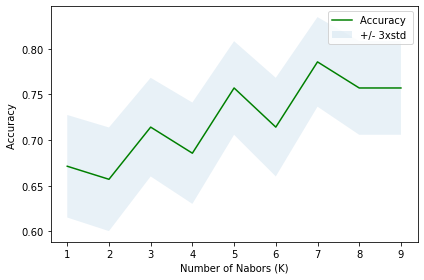

The best accuracy was with 0.7857142857142857 with k= 7


In [32]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# try with 10 different values of k to find the best one
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# accuracy
print(mean_acc)

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# result
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [33]:
# train model with k=7
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# predicted y
yhat_knn = neigh.predict(X_test)

# Accuracy score
accuracy_knn = accuracy_score(y_test, yhat_knn)
print("KNN accuracy index: ", accuracy_knn)

# jaccard
jaccard_knn = jaccard_score(y_test, yhat_knn,average='weighted')
print("knn Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN accuracy index:  0.7857142857142857
knn Jaccard index:  0.6627869897959183
KNN F1-score:  0.7766540244416351


# Decision Tree

In [35]:
# import library
from sklearn.tree import DecisionTreeClassifier
# create an instance of the DecisionTreeClassifier called loanTree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# training
loanTree.fit(X_train,y_train)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## optinal: evaluating our model

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
# predicted y
yhat_dt = loanTree.predict(X_test)

#accuracy score
ac_dt=accuracy_score(y_test,yhat_dt)
print("accuracy score:",ac_dt)
# jaccard
jaccard_dt = jaccard_score(y_test, yhat_dt,average='weighted')
print("knn Jaccard index: ", jaccard_dt)
# f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

accuracy score: 0.6142857142857143
knn Jaccard index:  0.49309723889555823
DT F1-score:  0.6445993031358885


# Support Vector Machine

In [37]:
# import library
from sklearn import svm
# training
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [38]:
# predicted y
yhat_svm = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

### evaluation by using accuracy_score, f1_score , jaccard-index

In [40]:
#accuracy score
ac_svm=accuracy_score(y_test,yhat_svm)
print("accuracy score:",ac_svm)

# jaccard
jaccard_svm = jaccard_score(y_test, yhat_svm,average='weighted')
print("SVM Jaccard index: ", jaccard_svm)

# f1_score
f1_score_svm = f1_score(y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

accuracy score: 0.7428571428571429
SVM Jaccard index:  0.6103896103896104
SVM F1-score:  0.7275882012724117


# Logistic Regression

In [41]:
# import library
from sklearn.linear_model import LogisticRegression
# training
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR
# predicted y
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)

### evaluation using f1_score , jaccard_index , log_loss

In [42]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


# jaccard
jaccard_lg = jaccard_score(y_test, yhat_lg,average='weighted')
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)

# logloss
logloss_lg = log_loss(y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.6173469387755102
LR F1-score:  0.6914285714285714
LR log loss:  0.4920179847937498
